### Aula 1

In [1]:
# Features (1: sim, 0: não)
# Pelo longo? Perna curta? Late?

porco1 = [0, 1, 0]
porco2 = [0, 1, 1] # ..... é um porco especial, não me julgue
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

x_train = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
y_train = [1, 1, 1, 0, 0, 0] # 1: porco, 0: cachorro

In [2]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(x_train, y_train)

LinearSVC()

In [3]:
animal_misterioso = [1, 1, 1]

modelo.predict([animal_misterioso])

array([0])

In [4]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

x_test = [misterio1, misterio2, misterio3]
y_test = [0, 1, 1]

previsoes = modelo.predict(x_test)
previsoes

array([0, 1, 0])

In [5]:
previsoes == y_test

array([ True,  True, False])

In [6]:
corretos = (previsoes == y_test).sum()
corretos

2

In [7]:
total = len(x_test)
acerto = corretos/ total
acerto

0.6666666666666666

In [8]:
from sklearn.metrics import accuracy_score

taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.6666666666666666

### Aula 2

In [9]:
import pandas as pd

In [10]:
tracking = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv")
tracking.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [11]:
x = tracking[["home", "how_it_works", "contact"]]
y = tracking["bought"]

In [12]:
tracking.shape

(99, 4)

In [13]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [15]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [16]:
previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.9583333333333334

In [17]:
SEED = 4242564

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, random_state = SEED)

In [20]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

1.0

In [21]:
treino_y.value_counts()

0    52
1    22
Name: bought, dtype: int64

In [22]:
52/22

2.3636363636363638

In [23]:
teste_y.value_counts()

0    14
1    11
Name: bought, dtype: int64

In [24]:
14/11

1.2727272727272727

In [25]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify = y)

In [26]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.96

In [27]:
treino_y.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [28]:
49/25

1.96

In [29]:
teste_y.value_counts()

0    17
1     8
Name: bought, dtype: int64

In [30]:
17/8

2.125

### Aula 3

In [31]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [32]:
trocar = {
    0: 1,
    1: 0
}

dados["finished"] = dados["unfinished"].map(trocar) 
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

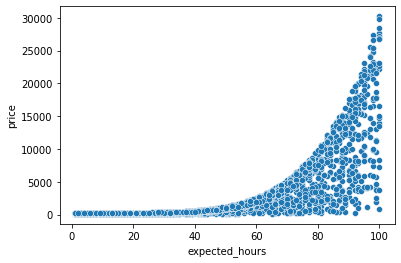

In [34]:
sns.scatterplot(x = "expected_hours", y = "price", data = dados)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

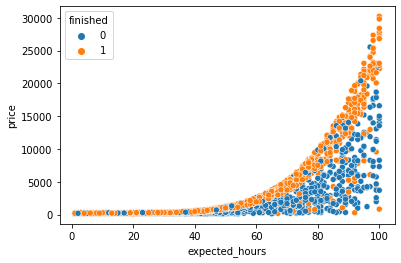

In [35]:
sns.scatterplot(x = "expected_hours", y = "price", data = dados, hue = "finished")

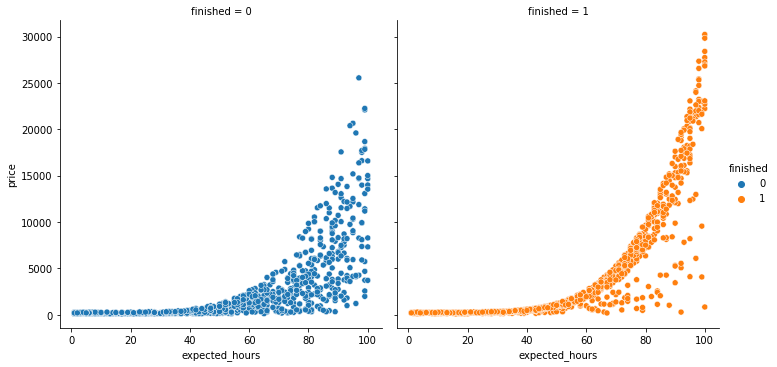

In [36]:
sns.relplot(x = "expected_hours", y = "price", data = dados, hue = "finished", col = "finished")

In [37]:
x = dados[["expected_hours", "price"]]
y = dados["finished"]

In [38]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, 
                                                         random_state = SEED, stratify = y)

In [39]:
modelo = LinearSVC(dual = False)
modelo.fit(treino_x, treino_y)

LinearSVC(dual=False)

In [40]:
previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.5518518518518518

In [41]:
import numpy as np

In [42]:
previsoes_dummy = np.ones(len(teste_x))

In [43]:
accuracy_score(teste_y, previsoes_dummy)

0.5259259259259259

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

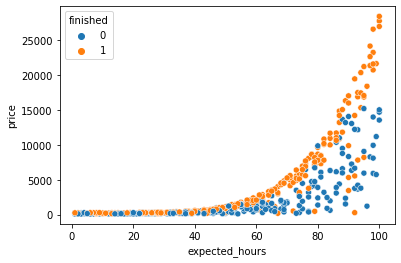

In [44]:
sns.scatterplot(x = "expected_hours", y = "price", hue = teste_y, data = teste_x)

In [45]:
x_min = teste_x["expected_hours"].min()
x_max = teste_x["expected_hours"].max()

y_min = teste_x["price"].min()
y_max = teste_x["price"].max()

In [46]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [47]:
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [48]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [49]:
Z = modelo.predict(pontos)
Z

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [50]:
Z.shape

(10000,)

In [51]:
xx.shape

(100, 100)

In [52]:
Z = Z.reshape(xx.shape)
Z.shape

(100, 100)

In [53]:
import matplotlib.pyplot as plt

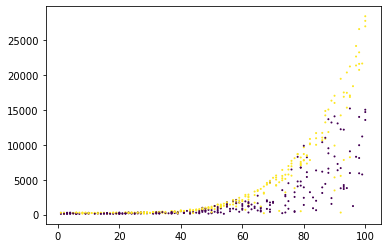

In [54]:
plt.scatter(teste_x["expected_hours"], teste_x["price"], c = teste_y, s = 1)

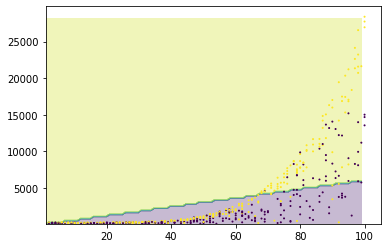

In [55]:
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x["expected_hours"], teste_x["price"], c = teste_y, s = 1)

# Decision boundary

### Aula 4

In [56]:
SEED = 4242564
np.random.seed(SEED)

In [57]:
from sklearn.svm import SVC

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.5481481481481482

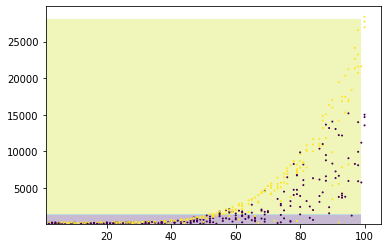

In [58]:
x_min = teste_x["expected_hours"].min()
x_max = teste_x["expected_hours"].max()

y_min = teste_x["price"].min()
y_max = teste_x["price"].max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x["expected_hours"], teste_x["price"], c = teste_y, s = 1)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.6666666666666666

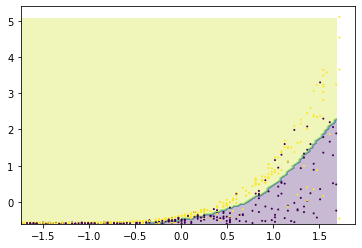

In [61]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s = 1)

### Aula 5

In [62]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [63]:
renomear = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_modelo",
    "price": "preco",
    "sold": "vendido"
}

dados = dados.rename(columns = renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [64]:
trocar = {
    "no": 0,
    "yes": 1
}

dados["vendido"] = dados["vendido"].map(trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [65]:
from datetime import datetime

dados["idade_modelo"] = datetime.today().year - dados["ano_modelo"]
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [66]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [67]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_modelo"])
dados.head()

,preco,vendido,idade_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [68]:
x = dados[["preco", "idade_modelo", "km_por_ano"]]
y = dados["vendido"]

In [69]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

modelo = LinearSVC(dual = False)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.7076

In [70]:
from sklearn.dummy import DummyClassifier

In [71]:
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)

previsoes = dummy.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.58

In [72]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

0.77